In [3]:
import pandas as pd

file = './data/MOE_and_GRID.csv'

df = pd.read_csv(file)
rd = {" SMILE": "SMILE", " SETID" : "SETID", " DESCRIPTOR": "GRID_DESCRIPTOR", " LOGD" : "LOGD"}
df.rename(columns = rd, inplace = True)

for v in df.columns:
    print("\""+v+"\"")


"Unnamed: 0"
"UNIQUEID"
"SMILE"
"SETID"
"GRID_DESCRIPTOR"
"LOGD"
"mol"
"AM1_dipole"
"AM1_E"
"AM1_Eele"
"AM1_HF"
"AM1_HOMO"
"AM1_IP"
"AM1_LUMO"
"apol"
"ASA"
"ASA+"
"ASA-"
"ASA_H"
"ASA_P"
"ast_fraglike"
"ast_fraglike_ext"
"ast_violation"
"ast_violation_ext"
"a_acc"
"a_acid"
"a_aro"
"a_base"
"a_count"
"a_don"
"a_donacc"
"a_heavy"
"a_hyd"
"a_IC"
"a_ICM"
"a_nB"
"a_nBr"
"a_nC"
"a_nCl"
"a_nF"
"a_nH"
"a_nI"
"a_nN"
"a_nO"
"a_nP"
"a_nS"
"balabanJ"
"BCUT_PEOE_0"
"BCUT_PEOE_1"
"BCUT_PEOE_2"
"BCUT_PEOE_3"
"BCUT_SLOGP_0"
"BCUT_SLOGP_1"
"BCUT_SLOGP_2"
"BCUT_SLOGP_3"
"BCUT_SMR_0"
"BCUT_SMR_1"
"BCUT_SMR_2"
"BCUT_SMR_3"
"bpol"
"b_1rotN"
"b_1rotR"
"b_ar"
"b_count"
"b_double"
"b_heavy"
"b_max1len"
"b_rotN"
"b_rotR"
"b_single"
"b_triple"
"CASA+"
"CASA-"
"chi0"
"chi0v"
"chi0v_C"
"chi0_C"
"chi1"
"chi1v"
"chi1v_C"
"chi1_C"
"chiral"
"chiral_u"
"DASA"
"DCASA"
"dens"
"density"
"diameter"
"dipole"
"dipoleX"
"dipoleY"
"dipoleZ"
"E"
"E_ang"
"E_ele"
"E_nb"
"E_oop"
"E_rele"
"E_rnb"
"E_rsol"
"E_rvdw"
"E_sol"
"E_stb"
"

In [4]:
list_of_desc = ["a_acc", \
                  "a_base", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "GRID_DESCRIPTOR"]
import numpy as np 

X = []
Y = []
setid = []
uniqueid = []
for idx, ss in enumerate(df["UNIQUEID"]):
    
    fdesc = df[df["UNIQUEID"] == ss]
    
    xval = []
    for d in list_of_desc:
        if d == "GRID_DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval.extend([float(nv) for nv in nvs])
        else:
            xval.append(fdesc[d].values[0])

    X.append(xval)
    Y.append(df[df["UNIQUEID"] == ss]['LOGD'].values[0])
    setid.append(df[df["UNIQUEID"] == ss]['SETID'].values[0])
    uniqueid.append(df[df["UNIQUEID"] == ss]['UNIQUEID'].values[0])

print(np.asarray(Y).shape, np.asarray(X).shape )

(1091,) (1091, 1908)


In [16]:
Xtr = []
Xte = []
Ytr = []
Yte = []
for idx, y in enumerate(Y):
    if setid[idx] == " Tr ":
        Xtr.append(X[idx])
        Ytr.append(Y[idx])
    elif setid[idx] == " Te ":
        Xte.append(X[idx])
        Yte.append(Y[idx])
        
print("    Test set: ", len(Yte), len(Xte))
print("Training set: ", len(Ytr), len(Xtr))

    Test set:  214 214
Training set:  877 877


   1 1.74220565 0.50264619
   2 1.24246579 0.64530875
   3 1.03290654 0.70513240
   4 0.93228406 0.73385746
   5 0.89209093 0.74533154
   6 0.88402140 0.74763518
   7 0.88726240 0.74670996
   8 0.88912945 0.74617696
   9 0.88965816 0.74602603
  10 0.88981133 0.74598231
  11 0.89066051 0.74573989
  12 0.89099053 0.74564568
  13 0.89071276 0.74572497
  14 0.89084809 0.74568634
  15 0.89086625 0.74568116
  16 0.89093613 0.74566121
  17 0.89093751 0.74566081
  18 0.89093371 0.74566190
  19 0.89093196 0.74566240
Suggested number of components tr:  6


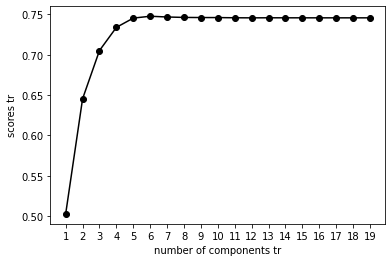

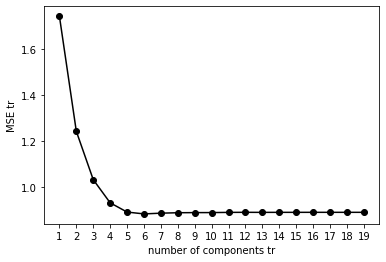

In [17]:
# valutazione del numero di componenti principali ideale da usare per costruire il modello PLS (SENZA il descrittore nmol )
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np
import matplotlib.pyplot as plt

trscores = []
trmses = []
trncomps = []
for trncomp in range(1,20):
    pls = PLSRegression(trncomp)
    pls.fit(Xtr, Ytr)
    
    y_cv = cross_val_predict(pls, Xtr, Ytr, cv=10)
    
    trscore = r2_score(Ytr, y_cv)
    trmse = mean_squared_error(Ytr, y_cv)
    
    trscores.append(trscore)
    trmses.append(trmse)
    trncomps.append(trncomp)
    print("%4d %10.8f %10.8f"%(trncomp, trmse, trscore))
    
msetrmin = np.argmin(trmses)
print("Suggested number of components tr: ", msetrmin+1)
    
plt.plot(trncomps, trscores, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('scores tr')
plt.xticks(trncomps)
plt.show()

plt.plot(trncomps, trmses, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('MSE tr')
plt.xticks(trncomps)
plt.show()

In [18]:
ncompsugg = 6

pls_6 = PLSRegression(ncompsugg)
pls_6.fit(Xtr, Ytr)
    
y_cv6 = cross_val_predict(pls_6, Xtr, Ytr, cv=10)
    
score6cv = r2_score(Ytr, y_cv6)
mse6cv = mean_squared_error(Ytr, y_cv6)    

print("comp: %4d MSE: %10.8f score: %10.8f"%(ncompsugg, mse6cv, score6cv))

comp:    6 MSE: 0.88402140 score: 0.74763518


In [19]:
ncompocchio = 4

pls_4 = PLSRegression(ncompocchio)
pls_4.fit(Xtr, Ytr)
    
y_cv4 = cross_val_predict(pls_4, Xtr, Ytr, cv=10)
    
score4cv = r2_score(Ytr, y_cv4)
mse4cv = mean_squared_error(Ytr, y_cv4)    

print("comp: %4d MSE: %10.8f score: %10.8f"%(ncompocchio, mse4cv, score4cv))

comp:    4 MSE: 0.93228406 score: 0.73385746


-0.7400000  0.6694728 -1.4094728  0.5963133 -1.3363133
-0.6800000 -0.2409585 -0.4390415 -0.3451573 -0.3348427
-0.5000000  0.3728343 -0.8728343  0.3530500 -0.8530500
-0.3900000 -0.2454996 -0.1445004 -0.5196862  0.1296862
-0.3400000 -0.3612681  0.0212681 -0.5474004  0.2074004
-0.2100000 -0.0135316 -0.1964684  0.0253987 -0.2353987
-0.1900000 -0.4307719  0.2407719 -0.1645830 -0.0254170
-0.1300000  1.2463410 -1.3763410  1.1761580 -1.3061580
-0.0500000  0.5269803 -0.5769803  0.8614952 -0.9114952
-0.0400000  1.2137782 -1.2537782  1.1632003 -1.2032003
 0.0500000  1.7120812 -1.6620812  1.7098242 -1.6598242
 0.2000000  1.5548183 -1.3548183  1.5765292 -1.3765292
 0.2100000 -0.0193490  0.2293490  0.1337551  0.0762449
 0.3000000  0.4111514 -0.1111514  0.3731784 -0.0731784
 0.4000000  0.8657969 -0.4657969  0.7222375 -0.3222375
 0.6400000  1.4216179 -0.7816179  1.3357382 -0.6957382
 0.6930000  0.5915144  0.1014856  0.4961563  0.1968437
 0.9800000  1.4738401 -0.4938401  1.4553496 -0.4753496
 1.1000000

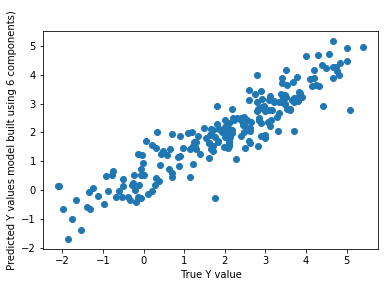

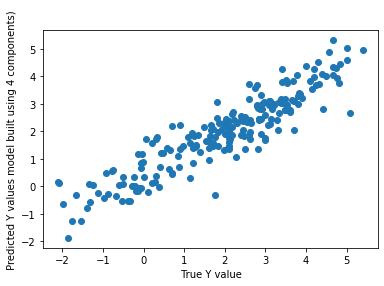

In [20]:
Y_pred6 = pls_6.predict(Xte)
Y_pred4 = pls_4.predict(Xte)

Y_pred6_TR = pls_6.predict(Xtr)
Y_pred4_TR = pls_4.predict(Xtr)

Y_pred6_Tot = pls_6.predict(X)
Y_pred4_Tot = pls_4.predict(X)


mse_pred6 = mean_squared_error(Yte, Y_pred6 )

RMSE_pred6 = mean_squared_error(Yte, Y_pred6, squared = False )

mse_pred4 = mean_squared_error(Yte, Y_pred4 )

RMSE_pred4 = mean_squared_error(Yte, Y_pred4, squared = False )


diff6 = []
diff4 =[]

for idx, val in enumerate(Yte):
    diff6.append(val-Y_pred6[idx])
    diff4.append(val-Y_pred4[idx])
    print("%10.7f %10.7f %10.7f %10.7f %10.7f"%(\
                                val, Y_pred6[idx], diff6[-1] ,Y_pred4[idx], diff4[-1] )) 
                            
score6 = r2_score(Yte, Y_pred6 )

score4 = r2_score(Yte, Y_pred4 )


print(" score modello a 6 componenti :", score6 )
print(" mse modello a 6 componenti :", mse_pred6)

print(" RMSE modello a 6 componenti :", RMSE_pred6)

print(" score modello a 4 componenti :", score4 )
print(" mse modello a 4 componenti :", mse_pred4)

print(" RMSE modello a 4 componenti :", RMSE_pred4)



plt.xlabel(" True Y value")
plt.ylabel(" Predicted Y values model built using 6 components) ")

plt.scatter(Yte, Y_pred6)

plt.show()

plt.xlabel(" True Y value")
plt.ylabel(" Predicted Y values model built using 4 components) ")

plt.scatter(Yte, Y_pred4)

plt.show()

   1 1.90266212 0.45684009
   2 1.50697713 0.56979773
   3 1.30291771 0.62805132
   4 1.15679991 0.66976410
   5 1.12419480 0.67907200
   6 1.11429390 0.68189845
   7 1.11257684 0.68238862
   8 1.12213031 0.67966136
   9 1.12227296 0.67962064
  10 1.12336152 0.67930988
  11 1.12304002 0.67940166
  12 1.12303355 0.67940351
  13 1.12272640 0.67949119
  14 1.12270269 0.67949796
  15 1.12286566 0.67945144
  16 1.12293237 0.67943239
  17 1.12291140 0.67943838
  18 1.12290570 0.67944001
  19 1.12291368 0.67943773
Suggested number of components tr:  7


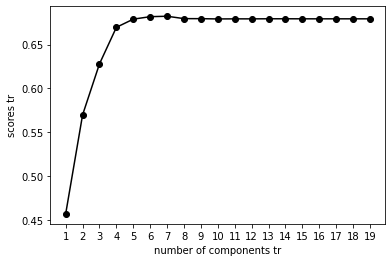

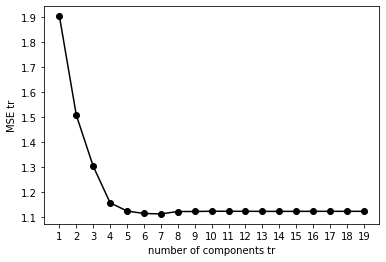

In [22]:
# valutazione del numero di componenti principali ideale da usare per costruire il modello PLS (SENZA il descrittore nmol )
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np
import matplotlib.pyplot as plt

trscores = []
trmses = []
trcomps = []
for trcomp in range(1,20):
    pls = PLSRegression(trcomp)
    pls.fit(Xtr, Ytr)
    
    y_cv = cross_val_predict(pls, Xtr, Ytr, cv=5)
    
    trscore = r2_score(Ytr, y_cv)
    trmse = mean_squared_error(Ytr, y_cv)
    
    trscores.append(trscore)
    trmses.append(trmse)
    trcomps.append(trcomp)
    print("%4d %10.8f %10.8f"%(trcomp, trmse, trscore))
    
msetrmin = np.argmin(trmses)
print("Suggested number of components tr: ", msetrmin+1)
    
plt.plot(trcomps, trscores, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('scores tr')
plt.xticks(trcomps)
plt.show()

plt.plot(trcomps, trmses, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('MSE tr')
plt.xticks(trcomps)
plt.show()

In [23]:
compsugg = 7

pls_7_cv5 = PLSRegression(compsugg)
pls_7_cv5.fit(Xtr, Ytr)
    
y_cv7_cv5 = cross_val_predict(pls_7_cv5, Xtr, Ytr, cv=5)
    
score7cv5 = r2_score(Ytr, y_cv7_cv5)
mse7cv5 = mean_squared_error(Ytr, y_cv7_cv5)    

print("comp: %4d MSE: %10.8f score: %10.8f"%(compsugg, mse7cv5, score7cv5))

comp:    7 MSE: 1.11257684 score: 0.68238862


In [24]:
compOCCHIO = 7

pls_5_cv5 = PLSRegression(compOCCHIO)
pls_5_cv5.fit(Xtr, Ytr)
    
y_cv5_cv5 = cross_val_predict(pls_5_cv5, Xtr, Ytr, cv=5)
    
score5cv5 = r2_score(Ytr, y_cv5_cv5)
mse5cv5 = mean_squared_error(Ytr, y_cv5_cv5)    

print("comp: %4d MSE: %10.8f score: %10.8f"%(compOCCHIO, mse5cv5, score5cv5))

comp:    7 MSE: 1.11257684 score: 0.68238862


-0.7400000  0.6373609 -1.3773609  0.6373609 -1.3773609
-0.6800000 -0.2768646 -0.4031354 -0.2768646 -0.4031354
-0.5000000  0.3727560 -0.8727560  0.3727560 -0.8727560
-0.3900000 -0.2587027 -0.1312973 -0.2587027 -0.1312973
-0.3400000 -0.4158250  0.0758250 -0.4158250  0.0758250
-0.2100000 -0.0349915 -0.1750085 -0.0349915 -0.1750085
-0.1900000 -0.3951852  0.2051852 -0.3951852  0.2051852
-0.1300000  1.2157331 -1.3457331  1.2157331 -1.3457331
-0.0500000  0.7068283 -0.7568283  0.7068283 -0.7568283
-0.0400000  1.2092325 -1.2492325  1.2092325 -1.2492325
 0.0500000  1.6416760 -1.5916760  1.6416760 -1.5916760
 0.2000000  1.5090640 -1.3090640  1.5090640 -1.3090640
 0.2100000 -0.0323673  0.2423673 -0.0323673  0.2423673
 0.3000000  0.3946559 -0.0946559  0.3946559 -0.0946559
 0.4000000  0.9238140 -0.5238140  0.9238140 -0.5238140
 0.6400000  1.4499670 -0.8099670  1.4499670 -0.8099670
 0.6930000  0.5904579  0.1025421  0.5904579  0.1025421
 0.9800000  1.4591524 -0.4791524  1.4591524 -0.4791524
 1.1000000

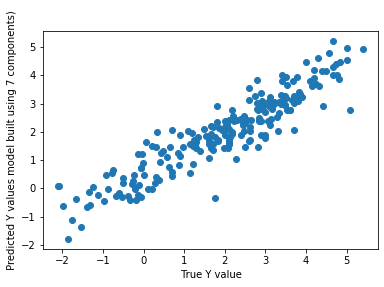

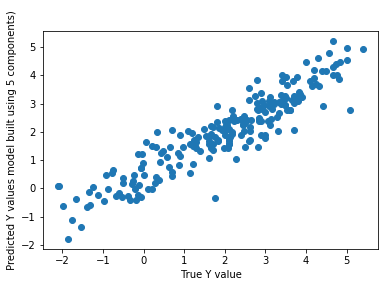

In [25]:
Y_pred7_cv5 = pls_7_cv5.predict(Xte)
Y_pred5_cv5 = pls_5_cv5.predict(Xte)

Y_pred7_TR_cv5 = pls_7_cv5.predict(Xtr)
Y_pred5_TR_cv5 = pls_5_cv5.predict(Xtr)

Y_pred7_Tot = pls_7_cv5.predict(X)
Y_pred5_Tot = pls_5_cv5.predict(X)


mse_pred7_cv5 = mean_squared_error(Yte, Y_pred7_cv5 )

RMSE_pred7_cv5 = mean_squared_error(Yte, Y_pred7_cv5, squared = False )

mse_pred5_cv5 = mean_squared_error(Yte, Y_pred5_cv5 )

RMSE_pred5_cv5 = mean_squared_error(Yte, Y_pred5_cv5, squared = False )


diff7_cv5 = []
diff5_cv5 =[]

for idx, val in enumerate(Yte):
    diff7_cv5.append(val-Y_pred7_cv5[idx])
    diff5_cv5.append(val-Y_pred5_cv5[idx])
    print("%10.7f %10.7f %10.7f %10.7f %10.7f"%(\
                                val, Y_pred7_cv5[idx], diff7_cv5[-1] ,Y_pred5_cv5[idx], diff5_cv5[-1] )) 
                            
score7_cv5 = r2_score(Yte, Y_pred7_cv5 )

score5_cv5 = r2_score(Yte, Y_pred5_cv5 )


print(" score modello a 7 componenti :", score7_cv5 )
print(" mse modello a 7 componenti :", mse_pred7_cv5)

print(" RMSE modello a 7 componenti :", RMSE_pred7_cv5)

print(" score modello a 5 componenti :", score5_cv5 )
print(" mse modello a 5 componenti :", mse_pred5_cv5)

print(" RMSE modello a 5 componenti :", RMSE_pred5_cv5)



plt.xlabel(" True Y value")
plt.ylabel(" Predicted Y values model built using 7 components) ")

plt.scatter(Yte, Y_pred7_cv5)

plt.show()

plt.xlabel(" True Y value")
plt.ylabel(" Predicted Y values model built using 5 components) ")

plt.scatter(Yte, Y_pred5_cv5)

plt.show()